In [4]:
from timeit import default_timer as d_timer
import numpy as np
import sorting


In [5]:
const_time = np.zeros(2000)
sum_time = np.zeros(2000)
mult_time = np.zeros(2000)
poly_time = np.zeros(2000)
polyHorn_time = np.zeros(2000)
bubleSort_time = np.zeros(250)
quickSort_time = np.zeros(2000)
timSort_time = np.zeros(2000)
matrxMult_time = np.zeros(250)

In [6]:
#It isn't original athour's code, the original  source is available via link https://www.geeksforgeeks.org/timsort/ 
MIN_MERGE = 32
 
def calcMinRun(n):
    """Returns the minimum length of a
    run from 23 - 64 so that
    the len(array)/minrun is less than or
    equal to a power of 2.
 
    e.g. 1=>1, ..., 63=>63, 64=>32, 65=>33,
    ..., 127=>64, 128=>32, ...
    """
    r = 0
    while n >= MIN_MERGE:
        r |= n & 1
        n >>= 1
    return n + r
 
 
# This function sorts array from left index to
# to right index which is of size atmost RUN
def insertionSort(arr, left, right):
    for i in range(left + 1, right + 1):
        j = i
        while j > left and arr[j] < arr[j - 1]:
            arr[j], arr[j - 1] = arr[j - 1], arr[j]
            j -= 1
 
 
# Merge function merges the sorted runs
def merge(arr, l, m, r):
     
    # original array is broken in two parts
    # left and right array
    len1, len2 = m - l + 1, r - m
    left, right = [], []
    for i in range(0, len1):
        left.append(arr[l + i])
    for i in range(0, len2):
        right.append(arr[m + 1 + i])
 
    i, j, k = 0, 0, l
     
    # after comparing, we merge those two array
    # in larger sub array
    while i < len1 and j < len2:
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
 
        else:
            arr[k] = right[j]
            j += 1
 
        k += 1
 
    # Copy remaining elements of left, if any
    while i < len1:
        arr[k] = left[i]
        k += 1
        i += 1
 
    # Copy remaining element of right, if any
    while j < len2:
        arr[k] = right[j]
        k += 1
        j += 1
 
 
# Iterative Timsort function to sort the
# array[0...n-1] (similar to merge sort)
def timSort(arr):
    n = len(arr)
    minRun = calcMinRun(n)
     
    # Sort individual subarrays of size RUN
    for start in range(0, n, minRun):
        end = min(start + minRun - 1, n - 1)
        insertionSort(arr, start, end)
 
    # Start merging from size RUN (or 32). It will merge
    # to form size 64, then 128, 256 and so on ....
    size = minRun
    while size < n:
         
        # Pick starting point of left sub array. We
        # are going to merge arr[left..left+size-1]
        # and arr[left+size, left+2*size-1]
        # After every merge, we increase left by 2*size
        for left in range(0, n, 2 * size):
 
            # Find ending point of left sub array
            # mid+1 is starting point of right sub array
            mid = min(n - 1, left + size - 1)
            right = min((left + 2 * size - 1), (n - 1))
 
            # Merge sub array arr[left.....mid] &
            # arr[mid+1....right]
            if mid < right:
                merge(arr, left, mid, right)
 
        size = 2 * size

In [7]:
np.random.seed(10)
import decimal
decimal.getcontext().prec = 100

def Const(vector):
    return 5.5

def Sum(vector):
    res = 0
    for v in vector:
        res += v
    return res

def Mult(vector):
    res = 1
    for v in vector:
        res *= v
    return res

def BubbleSort(vector):
    for i in range(len(vector)-1):
        for j in range(0, len(vector)-i-1):
            if vector[j] > vector[j + 1]:
                vector[j], vector[j + 1] = vector[j + 1], vector[j]
    return vector

def Quicksort(vector):
    return sorting.quick(vector)

def Polynom(vector):
    x = 1.5
    pol = 0
    n = len(vector)
    for i in range(n):
        pol += decimal.Decimal(vector[i]) * (decimal.Decimal(x) ** i)
    return pol

def PolyHorn(vector):
    x = 1.5
    n = len(vector)
    hor = vector[n-1]
    for i in range(n-2, 0, -1):
        hor = hor * x + vector[i]
    return hor

def TimSort(vector):
    return timSort(vector)

def MatrixMult(A, B):
    if A.shape[0] == B.shape[1]:
        return np.dot(A,B)


In [31]:
for i in range(2000):
    vector = np.random.rand(i+1)
    t0 = d_timer()
    result_cnst = Const(vector)
    const_time[i] = d_timer() - t0
    result_sum = Sum(vector)
    sum_time[i] = d_timer() - (t0 + const_time[i])
    result_multy = Mult(vector)
    mult_time[i] = d_timer() - (t0 + const_time[i] + sum_time[i])
    result_quick = Quicksort(vector)
    quickSort_time[i] = d_timer() - (t0 + const_time[i] + sum_time[i] + quickSort_time[i])
    result_poly = Polynom(vector)
    poly_time[i] = d_timer() - (t0 + const_time[i] + sum_time[i] + mult_time[i] + quickSort_time[i])
    result_polyHorn = PolyHorn(vector)
    polyHorn_time[i] = d_timer() - (t0 + const_time[i] + sum_time[i] + mult_time[i] + quickSort_time[i] + poly_time[i])
    result = TimSort(vector)
    timSort_time[i] = d_timer() - (t0 + const_time[i] + sum_time[i] + mult_time[i] + quickSort_time[i] + poly_time[i] + polyHorn_time[i])
     
    

/tmp/ipykernel_3834/4199902490.py:43: RuntimeWarning: overflow encountered in double_scalars
  hor = hor * x + vector[i]


In [10]:
for i in range(250):
    vector = np.random.rand(i+1)
    t0 = d_timer()
    result = BubbleSort(vector)
    bubleSort_time[i] = d_timer() - t0

In [12]:
for i in range(250):
    A = np.random.rand(i,i)
    B = np.random.rand(i,i)
    t0 = d_timer()
    result = MatrixMult(A, B)
    matrxMult_time[i] = d_timer() - t0

In [13]:
t_const = np.mean(const_time)
def linr(x):
    return x * t_const
def square(x):
    return t_const * (x ** 2)
def cube(x):
    return t_const * (x ** 3)
def n_logn(x):
    return t_const * (x * np.log2(x))

In [14]:
theor_const = np.zeros(2000)
theor_lin = np.zeros(2000)
theor_square = np.zeros(250)
theor_nlogn = np.zeros(2000)
theor_cube = np.zeros(250)
for i in range(2000):
    theor_const[i] = t_const
    theor_lin[i] = linr(i)
    theor_nlogn[i] = n_logn(i)
for i in range(250):
    theor_cube[i] = cube(i)
    theor_square[i] = square(i)

/tmp/ipykernel_3834/1826329026.py:9: RuntimeWarning: divide by zero encountered in log2
  return t_const * (x * np.log2(x))
/tmp/ipykernel_3834/1826329026.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return t_const * (x * np.log2(x))


In [15]:
from matplotlib import pyplot as plt

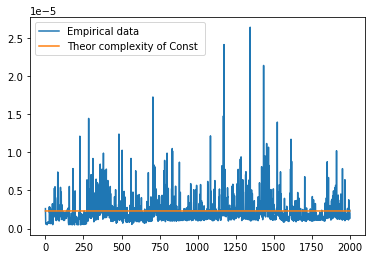

In [58]:
plt.plot(const_time)

plt.plot(theor_const)
plt.legend(['Empirical data', 'Theor complexity of Const '])
plt.savefig('const.png')

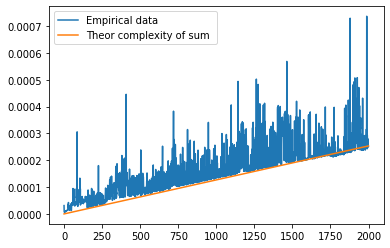

In [57]:
plt.plot(sum_time)

plt.plot(0.055*theor_lin)

plt.legend(['Empirical data', 'Theor complexity of sum '])
plt.savefig('sum.png')

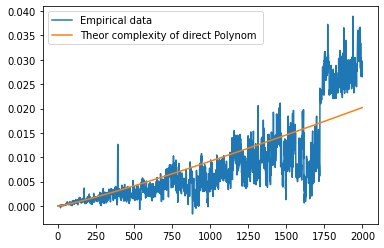

In [50]:
plt.plot(poly_time)
plt.plot(0.4*theor_nlogn)
plt.legend(['Empirical data', 'Theor complexity of direct Polynom '])
plt.savefig('polynom.png')

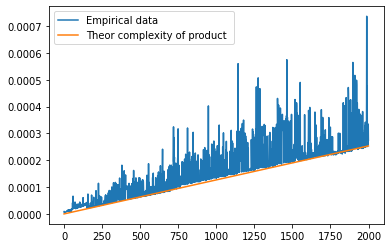

In [56]:
plt.plot(mult_time)
plt.plot(0.055*theor_lin)
plt.legend(['Empirical data', 'Theor complexity of product '])
plt.savefig('product.png')

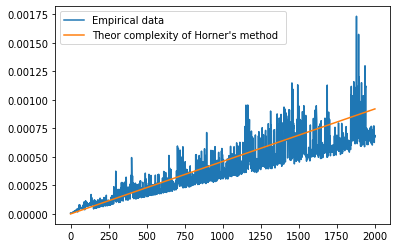

In [54]:
plt.plot(polyHorn_time)
plt.plot(0.2*theor_lin)
plt.legend(['Empirical data', "Theor complexity of Horner's method "])
plt.savefig('polyhorner.png')

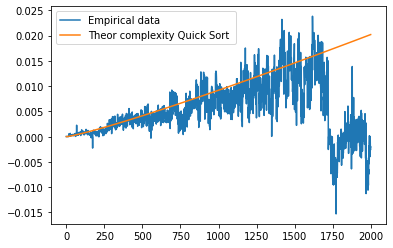

In [55]:
plt.plot(quickSort_time)
plt.plot(0.4*theor_nlogn)
plt.legend(['Empirical data', "Theor complexity Quick Sort "])
plt.savefig('quick.png')

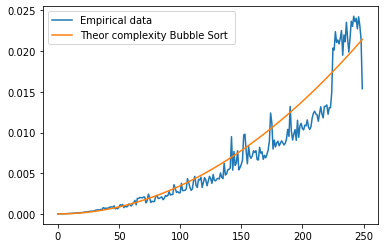

In [61]:
plt.plot(bubleSort_time)

plt.plot(0.15*theor_square)
plt.legend(['Empirical data', "Theor complexity Bubble Sort "])
plt.savefig('bubble.png')

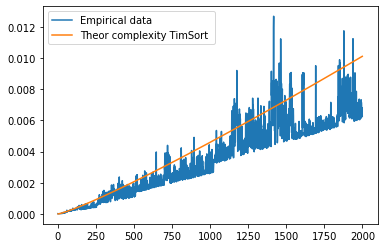

In [65]:
plt.plot(timSort_time)
plt.plot(0.2*theor_nlogn)
plt.legend(['Empirical data', "Theor complexity TimSort "])
plt.savefig('tim.png')

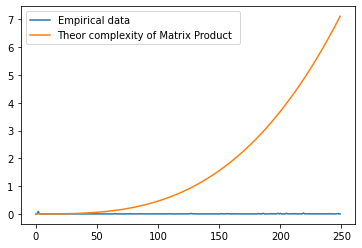

In [66]:
plt.plot(matrxMult_time)
plt.plot(0.2*theor_cube)
plt.legend(['Empirical data', "Theor complexity of Matrix Product "])
plt.savefig('matr.png')